# Washington Inshore CTD

In [1]:
# Setup all necessary packages for OOI data Requests
import requests
import os
import re
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import time
!pip install netcdf4==1.5.0 #Import to fix bug in OOI Thredds
!pip install git+https://github.com/tompc35/ooidata.git
import ooidata

# Setup default plot styles
import seaborn as sns
sns.set()

  Cloning https://github.com/tompc35/ooidata.git to /private/var/folders/j9/tlh1n1bx6nng6ht0z7pw7c600000gn/T/pip-req-build-lytt1otl
  Running command git clone -q https://github.com/tompc35/ooidata.git /private/var/folders/j9/tlh1n1bx6nng6ht0z7pw7c600000gn/T/pip-req-build-lytt1otl
  Created wheel for ooidata: filename=ooidata-0.0.1-cp37-none-any.whl size=2356 sha256=688c9d15537e17231f4419061b8667e500f76a3dae4f0489824c30e887b842e0
  Stored in directory: /private/var/folders/j9/tlh1n1bx6nng6ht0z7pw7c600000gn/T/pip-ephem-wheel-cache-euhnr3n4/wheels/69/6c/fb/ca7cc72a417d1e0cfc88fd19d8b54b4762d229d6d166d36356
Successfully built ooidata


In [2]:
# Examine Datasets available
#url_thredds = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sean.crosby@wwu.edu/20200410T161157017Z-CE06ISSP-SP001-09-CTDPFJ000-telemetered-ctdpf_j_cspp_instrument/catalog.html'
#url_thredds = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sean.crosby@wwu.edu/20200410T173212838Z-CE09OSPM-WFP01-03-CTDPFK000-telemetered-ctdpf_ckl_wfp_instrument/catalog.html'
url_thredds = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sean.crosby@wwu.edu/20200410T173212838Z-CE09OSPM-WFP01-03-CTDPFK000-telemetered-ctdpf_ckl_wfp_instrument/catalog.html'
dataset_list = ooidata.list_thredds_datasets(url_thredds,pattern_str='',append_str='',tds_url=None)
dataset_list

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sean.crosby@wwu.edu/20200410T173212838Z-CE09OSPM-WFP01-03-CTDPFK000-telemetered-ctdpf_ckl_wfp_instrument/deployment0008_CE09OSPM-WFP01-03-CTDPFK000-telemetered-ctdpf_ckl_wfp_instrument_20180101T023511-20180131T223808.996312.nc']

In [3]:
# Now let's use xarray to read and plot
ds = xr.open_mfdataset(dataset_list,combine='by_coords')
# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds = ds.swap_dims({'obs': 'time'}) 
# Sort the data
ds = ds.sortby('time'); 

OSError: [Errno -68] NetCDF: I/O failure: b'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sean.crosby@wwu.edu/20200410T173212838Z-CE09OSPM-WFP01-03-CTDPFK000-telemetered-ctdpf_ckl_wfp_instrument/deployment0008_CE09OSPM-WFP01-03-CTDPFK000-telemetered-ctdpf_ckl_wfp_instrument_20180101T023511-20180131T223808.996312.nc'

In [4]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:                                      (time: 535015)
Coordinates:
    obs                                          (time) int32 0 1 ... 535014
    lon                                          (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
  * time                                         (time) datetime64[ns] 2018-01-01T02:35:11 ... 2018-01-31T22:38:08.996311552
    pressure                                     (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    lat                                          (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
Data variables:
    practical_salinity                           (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity_qc_results   (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_pressure_qc_executed      (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
 

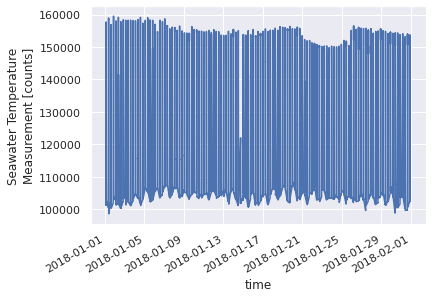

In [5]:
ds['temperature'].plot()

In [7]:
# Time slice
sdate = '2018-01-01'
edate = '2018-01-03'
ds_t_sum = ds['temperature'].sel(time=slice(sdate,edate))
ds_t_sum_p = ds.sel(pressure=)

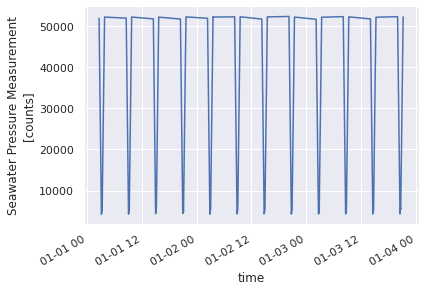

In [11]:
ds_t_sum['pressure'].plot()

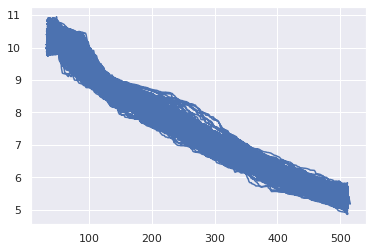

In [ ]:
pres = 'ctdpf_ckl_seawater_pressure'
temp = 'ctdpf_ckl_seawater_temperature'
import matplotlib.pyplot as plt
plt.plot(ds[pres],ds[temp])

In [ ]:
plt.scatter(x=ds['time'],y=ds[pres],c=ds[temp],s=20)
plt.colorbar

NameError: ignored

In [ ]:
# Day and Depth Binning Function
def bindata(vd,binvar):
  bins = np.arange(0, 200, 2) #Specify depth bins here
  labels = (bins[:-1] + bins[1:])/2
  a = vd.groupby_bins(binvar,bins,labels=labels).mean(dim=xr.ALL_DIMS, skipna=True)
  return a

In [ ]:
import pandas as pd
# Specify dates to process
dates = pd.date_range(start = '2018-01-01', end='2018-02-01', freq='D')
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
check = ds[temp].sel(time=slice(dates[0],dates[1])).load()

In [ ]:
check

<xarray.DataArray 'ctdpf_ckl_seawater_temperature' (time: 16776)>
array([5.223 , 5.2228, 5.2221, ..., 5.2824, 5.283 , 5.2874])
Coordinates:
    obs       (time) int32 0 1 2 3 4 5 6 ... 16770 16771 16772 16773 16774 16775
    lon       (time) float64 -125.0 -125.0 -125.0 ... -125.0 -125.0 -125.0
  * time      (time) datetime64[ns] 2018-01-01T02:35:11 ... 2018-01-01T21:40:50.995886592
    pressure  (time) float64 5.180e+04 5.181e+04 ... 5.218e+04 5.218e+04
    lat       (time) float64 46.85 46.85 46.85 46.85 ... 46.85 46.85 46.85 46.85
Attributes:
    comment:                  Seawater temperature near the sensor.
    long_name:                Seawater Temperature
    precision:                4
    data_product_identifier:  TEMPWAT_L1
    standard_name:            sea_water_temperature
    units:                    ºC
    ancillary_variables:      temperature
    _ChunkSizes:              10000

In [ ]:
check.time.data

array(['2018-01-01T02:35:11.000000000', '2018-01-01T02:35:12.003842560',
       '2018-01-01T02:35:13.007684608', ...,
       '2018-01-01T21:40:48.987659776', '2018-01-01T21:40:49.991773696',
       '2018-01-01T21:40:50.995886592'], dtype='datetime64[ns]')

In [ ]:
check.dtype

dtype('float64')

In [ ]:
ds[pres][np.any(ds[pres]<250,ds[pres]>50)]

TypeError: ignored

In [ ]:
# Try griddata 
ds[temp][0:100].plot()
plt.plot(ds[pres][0:100]/100)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcf6f3e81e0> (for post_execute):


ValueError: ignored

ValueError: ignored

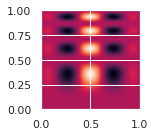

In [ ]:
import scipy
def func(x, y):
  return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])
grid_z0 = scipy.interpolate.griddata(points, values, (grid_x, grid_y), method='nearest')
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')

In [ ]:
my_x = pd.date_range(start = '2018-01-01', end='2018-02-01', freq='D')
my_y = np.arange(0,500,10)
grid_x, grid_y = np.mgrid[my_x,my_y]

AttributeError: ignored

In [ ]:
def to_float(d):
    epoch = d[0]
    return (d - epoch).total_seconds()

In [ ]:
ds

AttributeError: ignored

In [ ]:
ds['epoc_time']=(ds['time']-ds['time'][0])

In [ ]:
ds

<xarray.Dataset>
Dimensions:                                      (time: 535015)
Coordinates:
    obs                                          (time) int32 0 1 ... 535014
    lon                                          (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
  * time                                         (time) datetime64[ns] 2018-01-01T02:35:11 ... 2018-01-31T22:38:08.996311552
    pressure                                     (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    lat                                          (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
Data variables:
    practical_salinity                           (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity_qc_results   (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_pressure_qc_executed      (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature_qc_results    (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    density_qc_executed                          (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    driver_timestamp                             (time) datetime64[ns] dask.array<chunksize=(535015,), meta=np.ndarray>
    id                                           (time) |S64 dask.array<chunksize=(535015,), meta=np.ndarray>
    conductivity                                 (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    practical_salinity_qc_results                (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    temperature                                  (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    density                                      (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    provenance                                   (time) |S64 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_pressure                  (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    internal_timestamp                           (time) datetime64[ns] dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity_qc_executed  (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature               (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    ingestion_timestamp                          (time) datetime64[ns] dask.array<chunksize=(535015,), meta=np.ndarray>
    port_timestamp                               (time) datetime64[ns] dask.array<chunksize=(535015,), meta=np.ndarray>
    deployment                                   (time) int32 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_pressure_qc_results       (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    preferred_timestamp                          (time) object dask.array<chunksize=(535015,), meta=np.ndarray>
    practical_salinity_qc_executed               (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity              (time) float64 dask.array<chunksize=(535015,), meta=np.ndarray>
    density_qc_results                           (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature_qc_executed   (time) float32 dask.array<chunksize=(535015,), meta=np.ndarray>
    epoc_time                                    (time) timedelta64[ns] 00:00:00 ... 30 days 20:02:57.996311
Attributes:
    _NCProperties:                      version=1|netcdflibversion=4.6.1|hdf5...
    node:                               WFP01
    comment:                            
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             ctdpf_ckl_wf

In [ ]:
to_float(ds['time'].data)

AttributeError: ignored